# Основы работы с количественными данными

*Алла Тамбовцева*

## Практикум 6-7. Проверка гипотез о двух средних. Коэффициенты корреляции

Импортируем необходимые для работы библиотеки и модули:
    
* библиотека `pandas` для загрузки и обработки данных;
* модуль `stats` из библиотеки `scipy` (от *Scientific Python*) для реализации статистических критериев.

In [1]:
import pandas as pd
from scipy import stats

В файле `Diet.csv` сохранены результаты обследования участников эксперимента, которые следовали разным типам диеты. Переменные в файле:

* `Gender`: пол участника (0 – женский, 1 – мужской);
* `Age`: возраст участника;
* `Height`: рост участника (в см);
* `Diet`: тип диеты (`A`, `B`, `C`);
* `WeightS`: вес участника на начало эксперимента (в кг);
* `WeightE`: вес участника в конце эксперимента, после 6 недель диеты (в кг);
* `BMI`: индекс массы тела.

Загрузим данные и сохраним их в датафрейм `df`.

In [2]:
df = pd.read_csv("Diet.csv")
df

,Gender,Age,Height,Diet,WeightS,WeightE,BMI
0,0,58,141,C,70,63.0,35.209497
1,1,25,165,A,80,77.6,29.384757
2,1,36,155,C,71,68.5,29.552549
3,0,35,169,C,62,56.4,21.707923
4,1,37,198,B,79,71.1,20.151005
...,...,...,...,...,...,...,...
185,1,40,171,B,79,72.9,27.016860
186,0,37,172,B,58,56.0,19.605192
187,1,40,190,A,88,84.5,24.376731
188,0,35,171,C,72,64.4,24.622961


### Часть 1: сравнение средних в двух группах

Допустим, нам нужно понять, являлись ли диеты вообще эффективными. Другими словами, можно ли считать, что в конце эксперимента участники, в целом, весили меньше, чем в начале эксперимента.

Выведем описательные статистики для веса на начало диеты (по типы диет пока не делим):

In [3]:
df["WeightS"].describe()

count    190.000000
mean      73.568421
std        8.419117
min       58.000000
25%       68.000000
50%       72.000000
75%       79.000000
max       88.000000
Name: WeightS, dtype: float64

Выведем описательные статистики для веса на конец диеты (по типы диет пока не делим):

In [4]:
df["WeightE"].describe()

count    190.000000
mean      69.247895
std        8.359981
min       53.000000
25%       63.000000
50%       69.300000
75%       75.700000
max       84.500000
Name: WeightE, dtype: float64

В целом, видно, что вес участников в конце диеты стал меньше. О гарантированном снижении веса каждого участника мы говорить не можем, но минимальный и максимальный вес в конце эксперимента меньше, чем в начале, средний вес также ниже. 

Сконцентрируемся на среднем весе участников до диеты и после. Чтобы сравнить два средних, нам потребуется критерий Стьюдента для двух выборок (*two sample t-test*). У этого критерия есть различные варианты, нам сейчас принципиально одно – являются ли исследуемые группы независимыми или нет. Группы являются независимыми, если в них содержатся разные объекты. Так, если бы мы сравнивали средний вес мужчин и женщин или среднюю потеря веса людей с избыточным весом и с весом в норме, мы бы работали с независимыми группами (группы с делением по полу не пересекаются, ровно так же человек может относиться к группе с избыточным весом или нет). А здесь группы связанные – мы сравниваем вес до и после диеты одних и тех же людей, наблюдения парные. Поэтому нам потребуется критерий Стьюдента для двух парных выборок.

Сформулируем нулевую гипотезу и двустороннюю (направленную) альтернативную гипотезу:

$$
H_0: \mu_1 = \mu_2 \text{ и } H_1: \mu_1 \ne \mu_2,
$$

где $\mu_1$ и $\mu_2$ – средний вес до диеты и после (средние генеральных совокупностей, то есть всех возможных участников эксперимента, не только тех, по которым есть результаты, по ним мы все и так знаем стопроцентно). 

Для проверки нулевой гипотезы на реальных данных из датафрейма `df` воспользуемся функцией `ttest_rel()` из модуля `stats` (от *related*, связанные выборки):

In [5]:
# выборка 1 – вес до (WeightS)
# выборка 2 – вес после (WeightE)

stats.ttest_rel(df["WeightS"], df["WeightE"])

Ttest_relResult(statistic=23.107242131597395, pvalue=5.866133907061054e-57)

Наблюдаемое значение t-статистики получилось очень большим (`statistic=23.107`), а p-value, напротив, очень маленьким (примерно 0, это 5.86, умноженное на $10^{-57}$). На уровне значимости равном 5%, то есть 0.05, нулевую гипотезу следует отвергнуть ($\text{p-value}$ < $\alpha$), а значит, средние нельзя считать равными. Средний вес людей до и после диеты отличается. Следовательно, имеет смысл разбираться с различиями дальше, например, сравнивать эффективность разных типов диет.

Чтобы такие сравнения было удобнее выполнять, логично добавить в датафрейм `df` отдельный столбец с разницей веса до и после диеты. Создать его можно просто вычитанием значений `WeightE` из `WeightS`:

In [6]:
# новый столбец Diff (до этого в данных не было)
# проверим, что добавился

df["Diff"] = df["WeightS"] - df["WeightE"]
df

,Gender,Age,Height,Diet,WeightS,WeightE,BMI,Diff
0,0,58,141,C,70,63.0,35.209497,7.0
1,1,25,165,A,80,77.6,29.384757,2.4
2,1,36,155,C,71,68.5,29.552549,2.5
3,0,35,169,C,62,56.4,21.707923,5.6
4,1,37,198,B,79,71.1,20.151005,7.9
...,...,...,...,...,...,...,...,...
185,1,40,171,B,79,72.9,27.016860,6.1
186,0,37,172,B,58,56.0,19.605192,2.0
187,1,40,190,A,88,84.5,24.376731,3.5
188,0,35,171,C,72,64.4,24.622961,7.6


Изучим распределение полученного показателя – построим для него гистограмму:

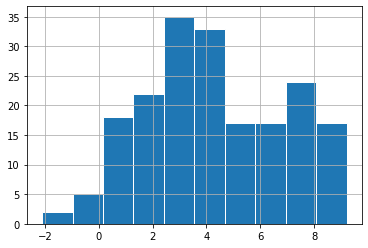

In [7]:
# выбираем столбец Diff
# строим гистограмму через .hist()
# с белым цветом границ столбцов

df["Diff"].hist(edgecolor = "white");

Распределение разницы в весе не похоже на симметричное, скошено вправо. При этом любопытно, что есть участники, которые в ходе диеты не только не сбросили вес, а наоборот, набрали (отрицательные значения на горизонтальной оси). Однако таких людей мало. 

Если хочется, можем проверить гипотезу о равенстве среднего числа сброшенных килограммов нулю (тот пример, что разбирали вручную):

$$
H_0: \mu = 0 \text{ и } H_1: \mu \ne 0.
$$

Так как при такой постановке вопроса выборка у нас уже одна (один набор значений – столбец `Diff` с разницей в весе), нам потребуется одновыборочный критерий Стьюдента (*one sample t-test*). Реализуется он с помощью функции с говорящим названием – `ttest_1samp()`:

In [8]:
# на первом месте выборка
# на втором месте в popmean – значение из нулевой гипотезы

stats.ttest_1samp(df["Diff"], popmean = 0)

Ttest_1sampResult(statistic=23.107242131597395, pvalue=5.866133907061054e-57)

Снова получили очень маленькое p-value, причём ровно такое же, как ранее в парном t-тесте. Это неслучайно: раз выборки связанные, нет никакой разницы, сравним мы два средних друг с другом, или их разность с нулем. В любом случае, гипотеза об отсутствии различий отвергается.

Перейдем к сравнению эффективности трех диет. Сгруппируем строки в датафрейме `df` по типу диеты (`Diet`), выберем столбец `Diff` из каждой группы и опишем его с помощью метода `.describe()`:

In [9]:
df.groupby("Diet")["Diff"].describe()

,count,mean,std,min,25%,50%,75%,max
Diet,,,,,,,,
A,66.0,3.593939,2.319475,-0.6,2.0,3.5,4.10,9.0
B,55.0,3.763636,2.428181,-2.1,2.2,3.6,5.05,7.9
C,69.0,5.459420,2.560866,0.5,3.5,6.1,7.30,9.2


Судя по всему, самая эффективная диета – это диета C. Участники, придерживающиеся этой диеты, в среднем, сбросили больше всего килограммов, плюс, люди во время этой диеты точно не набирали вес (минимум положителен). 

Визуализируем распределения разности веса `Diff` по группам – построим ящики с усами для каждого типа диеты:

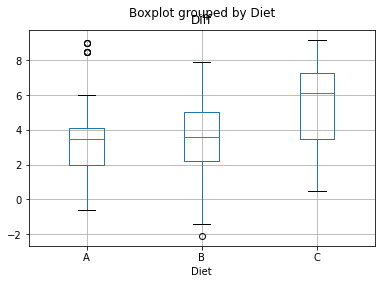

In [10]:
# boxplot() применяем ко всему датафрейму df
# из него выбираем столбец Diff
# и группировку по столбцу Diet

df.boxplot("Diff", by = "Diet");

Действительно, видно, что третья диета отличается от первых двух: минимум, медиана и максимум сильно выше. А вот первые две диеты, скорее всего, по эффективности одинаковы (медианы визуально почти совпадают). 

Перейдем к более строгим сравнениям. Для этого необходимо отобрать строки, соответствующие каждому типу диеты, и сохранить их в отдельные датафреймы:

In [11]:
diet_a = df[df["Diet"] == "A"]
diet_b = df[df["Diet"] == "B"]
diet_c = df[df["Diet"] == "C"]

Допустим, мы хотим сравнить диету A и диету B. Сформулируем гипотезы:
    
$$
H_0: \mu_a = \mu_b \text{ и } H_1: \mu_a \ne \mu_b
$$

где $\mu_a$ и $\mu_b$ – средние значения потери веса в группах A и B соответственно. Здесь уже две группы являются независимыми: даже если бы мы отобрали других участников для эксперимента, люди в группе A и B были бы разные, одни люди придерживаются одной диеты, другие – другой (не одни и те же участники сначала следуют диете A, а затем – диете B, и мы сравниваем результаты). 

Для проверки гипотезы выше воспользуемся критерием Стьюдента для двух независимых выборок. Применим соответствующую функцию `ttest_ind()` (от *independent*, независимые выборки):

In [12]:
stats.ttest_ind(diet_a["Diff"], diet_b["Diff"])

Ttest_indResult(statistic=-0.3922765832715036, pvalue=0.6955555613570376)

Итак, наблюдаемое значение статистики критерия примерно -0.4 (`statistic=-0.39`), недалеко от 0, то есть является довольно типичным при условии, что нулевая гипотеза верна. P-value при этом довольно высокое, почти 0.7, оно превышает любой принятый уровень значимости $\alpha$ (и 1%, и 5%, и 10%), значит, нулевая гипотеза не отвергается. Среднее количество сброшенных килограммов на двух диетах можно считать равным, диеты, в среднем, обладают одинаковой эффективностью. Это мы отметили еще на этапе разведывательного анализа – когда просто смотрели на ящики с усами.

По умолчанию Python всегда проверяет гипотезы против двусторонней альтернативы. Но на практике мы иногда формулируем односторонние, направленные, альтернативы. Какую направленную альтернативу выбрать здесь на основе имеющихся данных? Если посмотрим на выборочные средние в таблице по итогам `.describe()` выше, заметим, что среднее арифметическое для группы B немного больше, значит, можем предположить, что $\mu_b$ тоже больше $\mu_a$:

$$
H_0: \mu_a = \mu_b \text{ и } H_1: \mu_a < \mu_b
$$

Собственно, из-за того, что первое среднее меньше второго, ранее в `Ttest_indResult()` мы получили отрицательное значение статистики (при ее расчете в числителе – разность между средними). При изменении типа альтернативы немного меняется определение p-value. Так как теперь мы разрешаем отклонения от значения в гипотезе (разница 0) только в одну сторону, и распределение статистики симметрично относительно 0, полученное выше значение p-value нужно разделить на 2:

In [13]:
# pvalue в случае односторонней альтернативы

0.6955555613570376 / 2

0.3477777806785188

В данном случае p-value все равно выше конвенционально использумых уровней значимости, поэтому гипотеза по-прежнему не отвергается. Однако иногда может быть и наоборот! Поэтому при проверке гипотезы нужно всегда четко формулировать альтернативную гипотезу и понимать, почему нам необходим определенный вид альтернативы (тип альтернативы влияет на p-value и на дальнейший вывод).

К слову, модуль `stats` в новых версиях позволяет изменять тип альтернативы прямо внутри запускаемых функций. Так, в `ttest_ind()` есть аргумент `alternative`, по умолчанию его значение `"two-sided"`, двусторонняя альтернатива. Если нам нужна левосторонняя альтернатива, в `alternative` нужно поставить `"less"` (так как альтернатива со знаком `<`), если правосторонняя – `"greater"` (так как альтернатива со знаком `>`). Проверим:

In [14]:
stats.ttest_ind(diet_a["Diff"], diet_b["Diff"], alternative = "less")

Ttest_indResult(statistic=-0.3922765832715036, pvalue=0.3477777806785188)

Так и есть, значение `statistic` то же, а p-value сократилось в два раза.

### Часть 2: коэффициенты корреляции

Перейдем к оценке связей числовых показателей в `df`. Для начала построим диаграмму рассеивания между индексом массы тела (`BMI`) и потерей веса в ходе диеты (`Diff`):

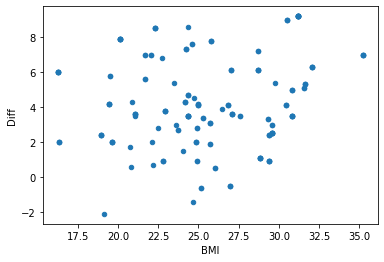

In [15]:
# функция plot.scatter,
# применяем к датафрейму df,
# из него берем столбцы BMI и Diff

df.plot.scatter(x = "BMI", y = "Diff");

Какой показатель указывать по оси `x`, а какой – по оси `y`, в общем случае, неважно, однако, если мы предполагаем, что связь все-таки направленная (один показатель может оказывать некоторый эффект на второй, то тогда первый указывается по горизонтальной оси, а второй – по вертикальной). 

Что можно сказать про направление и силу связи по полученной диаграмме? Тут все не совсем очевидно, «облако» точек очень широкое, связь точно будет слабой. Однако, если присмотреться, можно отметить, что наклон «облака» все-таки положительный, чем выше значения `BMI`, тем выше значения `Diff`. Значит, связь между индексом массы тела и сброшенным весом прямая, но слабая. Люди с высоким индексом массы тела (с весом выше нормы) сбрасывают больше веса. Вопрос: а насколько все-таки это связь слабая, будет ли она выявляться, если мы перейдем к другим аналогичным выборкам людей? 

Для ответа на этот вопрос вычислим коэффициент корреляции Пирсона и сразу проверим гипотезу о его незначимости.

$$
H_0: R = 0 \text{ (связи нет) и } H_1: R \ne 0 \text{ (связь есть)}
$$

Воспользуемся функцией с говорящим названием `pearsonr()`:

In [16]:
stats.pearsonr(df["BMI"], df["Diff"])

(0.15168422807534704, 0.03669608784811047)

Итак, коэффициент Пирсона между показателями (на конкретных данных в `df`) равен 0.15. Действительно, связь прямая (коэффициент положителен) и слабая (коэффициент менее 0.3 по модулю). Второе значение в выдаче – это p-value. На уровне значимости 5% есть основания отвергнуть нулевую гипотезу об отсутствии связи (p-value меньше $\alpha$), связь между показателя все-таки есть, просто довольно слабая.

**NB.** Если значение в выдаче выше у вас подписаны (более новая версия `stats`), в любом случае на первом месте сам коэффициент Пирсона, не значение соответствующей ему статистики, а на втором – p-value.

Как пример случая с сильной связью рассмотрим показатели `Height` и `BMI`. Содержательно это не так интересно, индекс массы тела [считается](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B5%D0%BA%D1%81_%D0%BC%D0%B0%D1%81%D1%81%D1%8B_%D1%82%D0%B5%D0%BB%D0%B0) в том числе на основе роста, но тем не менее. 

Посмотрим на диаграмму рассеивания:

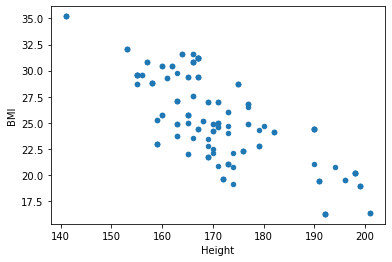

In [17]:
df.plot.scatter(x = "Height", y = "BMI");

Тут уже явный отрицательный наклон «облака» точек, похоже, что связь обратная и сильная. Это логично: рост в метрах стоит в знаменателе при расчете индекса массы тела, поэтому чем выше рост, тем ниже индекс массы тела. 
Вычислим коэффициент Пирсона и проверим гипотезу об отсутствии связи:

In [18]:
stats.pearsonr(df["Height"], df["BMI"])

(-0.7612060200055474, 3.322691618723704e-37)

Коэффициент Пирсона равен –0.76, p-value равно 0. Значит, связь обратная, близкая к сильной, статистически значимая (коэффициент значимо отличается от нуля).

В данном случае все рассмотренные ранее показатели (`Height`, `BMI`, `Diff`) измерены в количественной шкале, явных выбросов на диаграммах рассеивания не наблюдается, нелинейности тоже, поэтому необходимости в коэффициенте Спирмена нет. Тем не менее, для последнего случая интересно сравнить коэффициенты Пирсона и Спирмена, так как на диаграмме рассеивания все же есть точка, немного отстоящая от остального «облака» точек, это человек с довольно высоким значеним `BMI` примерно 35.

Воспользуемся функцией `spearmanr()`:

In [19]:
stats.spearmanr(df["BMI"], df["Height"])

SpearmanrResult(correlation=-0.7234198429886872, pvalue=4.516203631027468e-32)

Гипотеза об отсутствии связи все так же отвергается, а вот коэффициент получился по модулю чуть ниже, чем коэффициент Пирсона. Это ожидаемо: коэффициент Спирмена устойчив к выбросам из-за работы не с самими наблюдениями, а с их рангами, а значит, он слабее «реагирует» на точки вне основного «облака» точек, точка с высоким `BMI` уже не вносит значимого вклада при вычислении коэффициента корреляции.